In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/Users/rahul/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/rahul/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("weight-height.csv")

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df = df.drop("Gender",axis = 1)

In [5]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

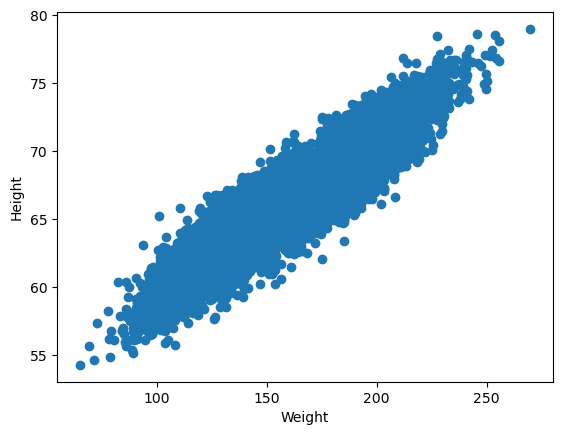

In [6]:
# Plot the scatter plot for the above data
plt.scatter(df["Weight"], df["Height"])
plt.xlabel("Weight")
plt.ylabel("Height")

In [19]:
# Trying to understand the correlation
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


In [21]:
## Independent and dependent feature
X = df[["Weight"]] ## independent feature should be a dataframe or 2 dimensional dataframe
Y = df["Height"] ## this variable can be in series or 1d array

In [22]:
X_series = df["Weight"]
np.array(X_series).shape

(10000,)

In [23]:
np.array(X).shape

(10000, 1)

In [24]:
## Train test Split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [28]:
## Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

In [30]:
#APPLY linear regression
from sklearn.linear_model import LinearRegression

In [32]:
regression = LinearRegression(n_jobs=-1)

In [33]:
regression.fit(X_train, Y_train )

LinearRegression(n_jobs=-1)

In [35]:
print("Coefficient or slope", regression.coef_)
print("Intercept", regression.intercept_)

Coefficient or slope [3.5520765]
Intercept 66.34834766149207


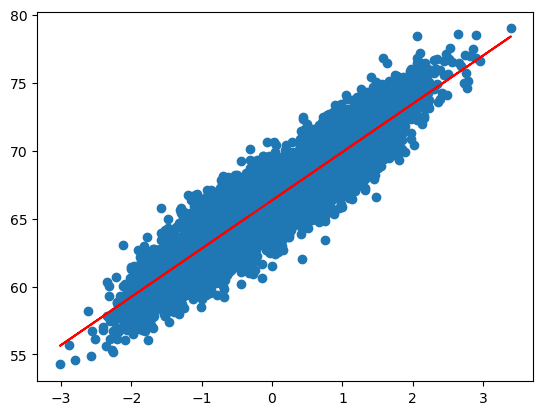

In [39]:
## plot training data plot best fit line
plt.scatter(X_train, Y_train)
plt.plot(X_train, regression.predict(X_train), color = 'red')

In [40]:
### Prediction of test data
y_pred = regression.predict(X_test)

In [41]:
## Performance MEtrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [42]:
mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

2.124500293128046
1.16186862410503
1.457566565590761


In [44]:
## R square metric
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred)
print(score)

0.857428881104187


In [46]:
## Adjusted R square
1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.8573718069973433

In [47]:
## OLS Linear Regression
import statsmodels.api as sm
model = sm.OLS(Y_train, X_train).fit()

In [48]:
prediction = model.predict(X_test)
print(prediction)

[ 1.3183849   3.7639285   0.99687554 ... -4.1451931   0.45415466
  0.20823876]


In [50]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              21.48
Date:                Mon, 08 Jul 2024   Prob (F-statistic):                    3.63e-06
Time:                        18:59:45   Log-Likelihood:                         -42106.
No. Observations:                7500   AIC:                                  8.421e+04
Df Residuals:                    7499   BIC:                                  8.422e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [53]:
## Prediction for new data
regression.predict(scaler.transform([[100]]))

/Users/rahul/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([59.55614352])